In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import os
from scipy.stats import pearsonr, spearmanr, fisher_exact, mannwhitneyu, ttest_ind

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

from matplotlib.pyplot import rc_context
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.cm as cm

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
sys.path.append('../../Code/')
from utils import read_dataset_log
import pickle as pkl
import matplotlib.gridspec as gridspec

In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
label_fontsize = 10
tick_fontsize = 8

In [3]:
figdir = '../../Figures/Components'

In [4]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data

In [5]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))

# Plot % GEP usage by lineage

In [7]:
params.columns

Index(['dataset', 'usage_fn', 'gene_scores_fn', 'gene_tpm_fn', 'tcat_fn',
       'tcat_fn_withsingletons', 'manual_gating_fn',
       'manual_activation_gating_fn', 'activation_score_fn', 'metadata_fn',
       'Processing notebook path', 'cNMF notebook path', 'cluster_col',
       'sample_col', 'individual_col', 'name', 'cnmf_dir', 'k', 'dt',
       'processed_forcnmf_fn', 'tpm_counts_for_cnmf_fn', 'raw_counts_filt_fn',
       'raw_counts_fn', 'dataset_type', 'tissue_type', 'context_label'],
      dtype='object')

In [8]:
allX = []
for dataset in [ 'Sparks',  'COMBAT',]:
    usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
    usage.columns = usage.columns.map(rename_map)
    usage_norm = usage.div(usage.sum(axis=1), axis=0)
    X = usage_norm[['Th1-Like', 'Treg', 'Th2-Resting', 'Th17-Resting', 'Th22', 'Th2-Activated', 'Th17-Activated']]
    X['Dataset'] = dataset
    gating = pd.read_csv(params.loc[dataset, 'manual_gating_fn'], sep='\t', index_col=0)['0']
    X['gating'] = gating.loc[X.index]
    
    meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], sep='\t', index_col=0)
    
    
    X['individual'] = meta.loc[X.index, params.loc[dataset, 'individual_col']]
    X['sample'] = meta.loc[X.index, params.loc[dataset, 'sample_col']]    
    allX.append(X)
    
allX = pd.concat(allX, axis=0)

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or se

In [21]:
gate_map = {'CD4_Naive':'CD4', 'CD4_CM':'CD4', 'CD8_EM':'CD8', 'CD4_EM':'CD4', 'Treg':'CD4', 'CD8_TEMRA':'CD8',
       'CD8_Naive':'CD8', 'CD4_TEMRA':'CD4', 'MAIT':'Other', 'gdT':'Other', 'DN':'Other', 'DP':'Other', 'CD8_CM':'CD8'}

allX['broad_gate'] = allX['gating'].replace(gate_map)

In [9]:
allX['Dataset'].value_counts()

COMBAT    399599
Sparks    336739
Name: Dataset, dtype: int64

In [22]:
allX['broad_gate'].value_counts()

CD4      474968
CD8      196067
Other     65303
Name: broad_gate, dtype: int64

In [23]:
order = [ 'Treg',
 'CD4_EM',
 'CD4_CM',
 'CD4_Naive',
 'CD8_EM',
 'CD8_CM',
 'CD8_Naive',
 'CD8_TEMRA',
 'MAIT',
 'DP',
 'gdT',
'DN',
        ]

In [24]:
cellthresh = 20
geps = ['Treg',  'Th17-Resting','Th2-Resting',  'Th1-Like']
thresh = 0.1
ind = allX['Dataset'] == 'COMBAT'
sample_sum = allX.loc[ind, :].groupby(['sample', 'gating']).agg(lambda x: (x>thresh).mean())[geps] * 100
sample_sum['Ncell'] = allX.loc[ind, :].groupby(['sample', 'gating']).count()['Th1-Like']
sample_sum = sample_sum.reset_index()
sample_sum = sample_sum.loc[sample_sum['Ncell']>cellthresh, :]

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  """


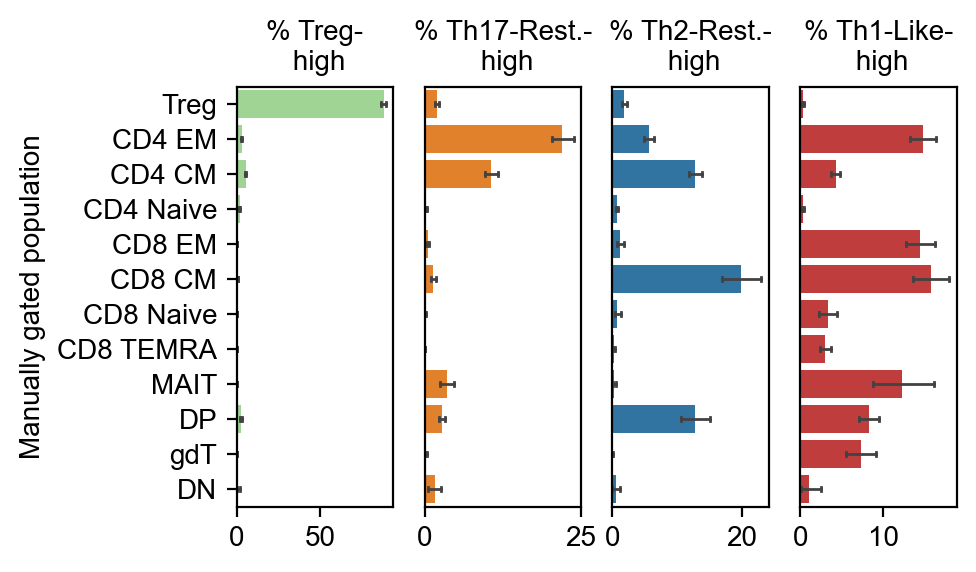

In [25]:
legleft = .8
legbot = .9

colors = np.array(sns.color_palette("tab20"))[[5, 2, 0, 6], :]
fig,axes = plt.subplots(1, 4, figsize=(5,3), dpi=200, gridspec_kw={'top':.8, 'bottom':.1, 'left':.25, 'right':.97})
for i,g in enumerate(geps):
    ax = axes[i]
    sns.barplot(y='gating', x=g, data=sample_sum, ax=ax, order=order, color=colors[i, :], capsize=.1, errwidth=1, ci=95 )
    
    ax.set_title('% ' + g.replace('Resting', 'Rest.') + '-\n high', fontsize=10)
    ax.set_xlabel('')

    if i ==0:
        ax.set_yticks(np.arange(len(order)))
        ax.set_yticklabels([x.replace('_', ' ') for x in order])
        ax.set_ylabel('Manually gated population', fontsize=10)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel('')
        
plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Barplot.png'))
plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Barplot.pdf'))

In [26]:
sample_sum.groupby('gating').mean().sort_values(by='Treg', ascending=False)

,Treg,Th17-Resting,Th2-Resting,Th1-Like,Ncell
gating,,,,,
Treg,87.993379,1.977559,1.819620,0.309066,90.843750
CD4_CM,5.305834,10.708417,12.827518,4.276308,718.613139
CD4_EM,2.957938,22.092181,5.590588,14.697229,303.637037
DP,2.577377,2.774773,12.794555,8.270843,102.608000
CD4_Naive,1.773927,0.289735,0.680541,0.344329,850.191176
CD4_TEMRA,1.301390,1.172883,0.000000,0.985222,26.142857
DN,0.924076,1.618173,0.550334,1.108844,39.642857
CD8_CM,0.729878,1.403024,19.793411,15.706879,81.465517
CD8_EM,0.305704,0.506369,1.225345,14.366321,247.216418


In [31]:
ind = allX['Dataset'] == 'COMBAT'
ct = pd.crosstab(allX.loc[ind, 'Th1-Like']>0.1, allX.loc[ind, 'broad_gate'])
ct.loc[True, :] / ct.loc[True, :].sum()

broad_gate
CD4      0.535148
CD8      0.360691
Other    0.104161
Name: True, dtype: float64

In [32]:
ind = allX['Dataset'] == 'COMBAT'
ct = pd.crosstab(allX.loc[ind, 'Th2-Resting']>0.1, allX.loc[ind, 'broad_gate'])
ct.loc[True, :] / ct.loc[True, :].sum()

broad_gate
CD4      0.784374
CD8      0.119012
Other    0.096614
Name: True, dtype: float64

In [33]:
ind = allX['Dataset'] == 'COMBAT'
ct = pd.crosstab(allX.loc[ind, 'Th17-Resting']>0.1, allX.loc[ind, 'broad_gate'])
ct.loc[True, :] / ct.loc[True, :].sum()

broad_gate
CD4      0.962687
CD8      0.012594
Other    0.024719
Name: True, dtype: float64

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  import sys
/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  import sys


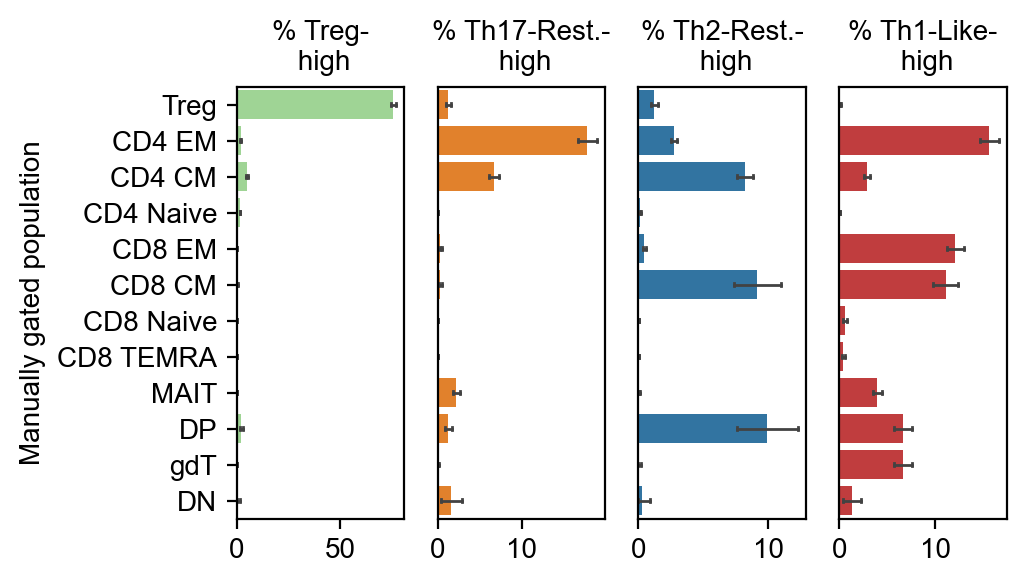

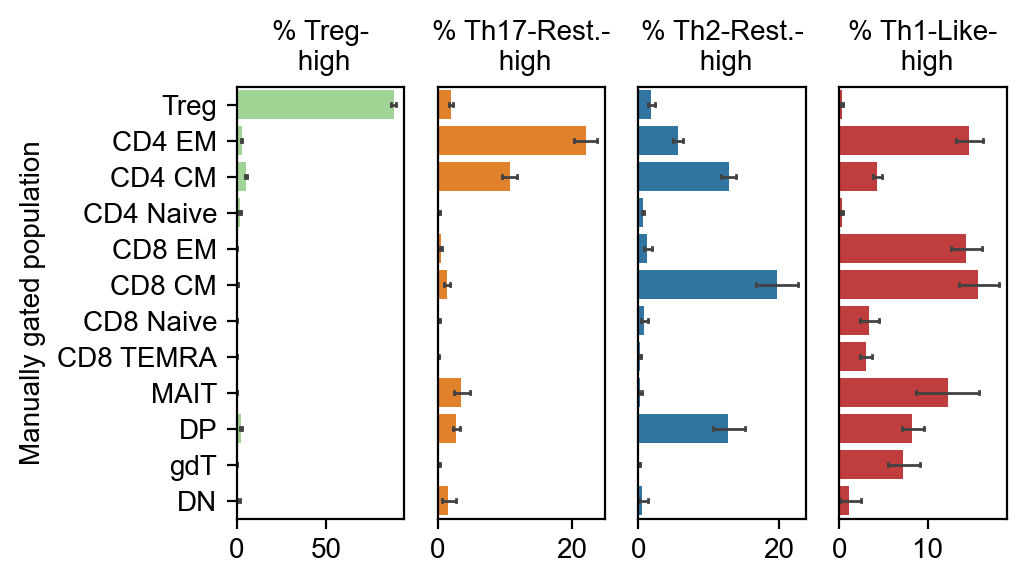

In [228]:
colors = np.array(sns.color_palette("tab20"))[[5, 2, 0, 6], :]
cellthresh = 20
geps = ['Treg',  'Th17-Resting','Th2-Resting',  'Th1-Like']
thresh = 0.1
for dataset in [ 'Sparks',  'COMBAT']:
    ind = allX['Dataset'] == dataset
    sample_sum = allX.loc[ind, :].groupby(['sample', 'gating']).agg(lambda x: (x>thresh).mean())[geps] * 100
    sample_sum['Ncell'] = allX.loc[ind, :].groupby(['sample', 'gating']).count()['Th1-Like']
    sample_sum = sample_sum.reset_index()
    sample_sum = sample_sum.loc[sample_sum['Ncell']>cellthresh, :]

    fig,axes = plt.subplots(1, 4, figsize=(5,3), dpi=200, gridspec_kw={'top':.97, 'bottom':.25, 'left':.2, 'right':.97})
    for i,g in enumerate(geps):
        ax = axes[i]
        sns.barplot(y='gating', x=g, data=sample_sum, ax=ax, order=order, color=colors[i, :], capsize=.1, errwidth=1, ci=95 )
    
        ax.set_title('% ' + g.replace('Resting', 'Rest.') + '-\n high', fontsize=10)
        ax.set_xlabel('')

        if i ==0:
            ax.set_yticks(np.arange(len(order)))
            ax.set_yticklabels([x.replace('_', ' ') for x in order])
            ax.set_ylabel('Manually gated population', fontsize=10)
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
            ax.set_ylabel('')

In [239]:
cellthresh = 20
geps = ['Treg',  'Th17-Resting','Th2-Resting',  'Th1-Like']
thresh = 0.1

alldatasetres = {}
for dataset in [ 'Sparks', 'COMBAT']:
    ind = allX['Dataset'] == dataset
    sample_sum = allX.loc[ind, :].groupby(['sample', 'gating']).agg(lambda x: (x>thresh).mean())[geps] * 100
    sample_sum['Ncell'] = allX.loc[ind, :].groupby(['sample', 'gating']).count()['Th1-Like']
    sample_sum = sample_sum.reset_index()
    sample_sum = sample_sum.loc[sample_sum['Ncell']>cellthresh, :]
    alldatasetres[dataset] = sample_sum.groupby('gating')[geps].mean().loc[order, :]

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  


In [240]:
from scipy.stats import pearsonr
for g in geps:
    print(g, pearsonr(alldatasetres['Sparks'][g], alldatasetres['COMBAT'][g]))

Treg (0.9999414981448156, 5.395807024610704e-21)
Th17-Resting (0.9935246221011551, 8.869177193146775e-11)
Th2-Resting (0.9621061356090462, 5.773868791867455e-07)
Th1-Like (0.9036769962457424, 5.544634166704902e-05)


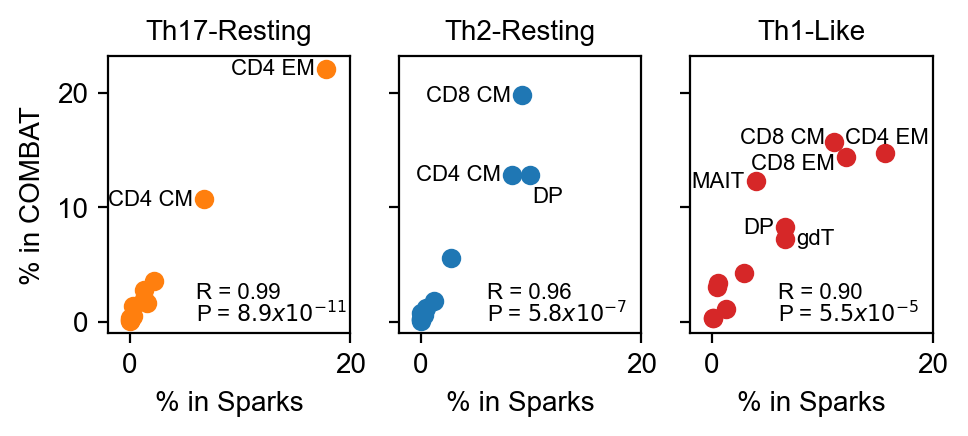

In [244]:
(fig,axes) = plt.subplots(1,3, figsize=(5, 2.2), dpi=200, sharey=True, gridspec_kw={'bottom':.25, 'right':.95})
geps = ['Th17-Resting','Th2-Resting',  'Th1-Like']
labmap = {'Th17-Resting': ['CD4_EM', 'CD4_CM'], 'Th2-Resting':['CD8_CM', 'CD4_CM', 'DP'],  'Th1-Like':['CD8_CM', 'CD4_EM', 'CD8_EM', 'MAIT', 'DP', 'gdT']}
for i,g in enumerate(geps):
    axes[i].scatter(alldatasetres['Sparks'][g], alldatasetres['COMBAT'][g], color=colors[1+i, :])
    axes[i].set_title(g, fontsize=10), 
    axes[i].set_xlabel('% in Sparks', fontsize=10)
    
    for lin in labmap[g]:
        if (lin == 'DP') and (g == 'Th2-Resting'):
            axes[i].text(alldatasetres['Sparks'].loc[lin, g]+.2, alldatasetres['COMBAT'].loc[lin, g]-1, lin.replace('_', ' '), fontsize=8, ha='left', va='top')   
        elif  ((lin == 'CD4_EM') and (g == 'Th1-Like')):
            axes[i].text(alldatasetres['Sparks'].loc[lin, g]+.2, alldatasetres['COMBAT'].loc[lin, g]+.5, lin.replace('_', ' '), fontsize=8, ha='center', va='bottom')    
        elif (lin == 'CD8_CM') and (g == 'Th1-Like'):
            axes[i].text(alldatasetres['Sparks'].loc[lin, g]-.8, alldatasetres['COMBAT'].loc[lin, g]+1.3, lin.replace('_', ' '), fontsize=8, ha='right', va='top')  
        elif (lin == 'CD8_EM') and (g == 'Th1-Like'):
            axes[i].text(alldatasetres['Sparks'].loc[lin, g]-1, alldatasetres['COMBAT'].loc[lin, g]-.5, lin.replace('_', ' '), fontsize=8, ha='right', va='center')  
        elif (lin == 'gdT') and (g == 'Th1-Like'):
            axes[i].text(alldatasetres['Sparks'].loc[lin, g]+1, alldatasetres['COMBAT'].loc[lin, g], lin.replace('_', ' '), fontsize=8, ha='left', va='center')  
        else:
            axes[i].text(alldatasetres['Sparks'].loc[lin, g]-1, alldatasetres['COMBAT'].loc[lin, g], lin.replace('_', ' '), fontsize=8, ha='right', va='center')
            
            
    axes[i].set_xlim([-2,20])
    R,P = pearsonr(alldatasetres['Sparks'][g], alldatasetres['COMBAT'][g])
    axes[i].text(6., 2., 'R = %.2f' % R, fontsize=8)
    Psplit = format(P, ".1e").split('e')
    axes[i].text(6., 0, 'P = $%sx10^{%s}$' % (Psplit[0], Psplit[1].replace('-0', '-')), fontsize=8)
        
    
    if i == 0:
        axes[i].set_ylabel('% in COMBAT', fontsize=10)
        
plt.savefig(os.path.join(figdir, 'PolarizationVsGating.SparksComparison.png'))
plt.savefig(os.path.join(figdir, 'PolarizationVsGating.SparksComparison.pdf'))

['5.40', '-21']

In [191]:
np.log10(3.45e3)

3.537819095073274

In [ ]:
32

In [188]:
4

4

In [149]:
alldatasetres[dataset].sort_values(by='Th1-Like', ascending=False)

,Treg,Th17-Resting,Th2-Resting,Th1-Like
gating,,,,
CD8_CM,0.729878,1.403024,19.793411,15.706879
CD4_EM,2.957938,22.092181,5.590588,14.697229
CD8_EM,0.305704,0.506369,1.225345,14.366321
MAIT,0.036355,3.537827,0.256916,12.260783
DP,2.577377,2.774773,12.794555,8.270843
gdT,0.059440,0.193380,0.084740,7.256614
CD4_CM,5.305834,10.708417,12.827518,4.276308
CD8_Naive,0.249368,0.184144,0.788806,3.338497
CD8_TEMRA,0.161138,0.075205,0.212767,3.007922


,Th1-Like,Treg,Th2-Resting,Th17-Resting,Th22,Th2-Activated,Th17-Activated,Dataset,gating,individual,...,CCR4,CCR6,CXCR3,AHR,IL4,IL5,IL13,IL17A,IL17F,IFNG
AAACCTGAGCGGATCA-1-gPlexA1,0.002831,0.034980,0.006579,0.010255,3.271008e-02,0.012793,0.010395,COMBAT,CD8_EM,S00112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGCTCGAC-1-gPlexA1,0.024661,0.007576,0.032989,0.029651,7.625121e-02,0.004483,0.000709,COMBAT,CD4_CM,S00005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATCTATGG-1-gPlexA1,0.122923,0.013905,0.012643,0.007051,7.632461e-03,0.000425,0.004489,COMBAT,CD4_EM,H00067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCTCTCTG-1-gPlexA1,0.038078,0.061110,0.010558,0.066082,1.687358e-02,0.009539,0.002882,COMBAT,CD4_CM,N00027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCACCGGGT-1-gPlexA1,0.002457,0.007651,0.003494,0.001061,2.505686e-03,0.002320,0.002294,COMBAT,CD8_TEMRA,U00515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCTCAACC-1-gPlexK7,0.014436,0.024623,0.034682,0.010187,8.667998e-03,0.007406,0.001145,COMBAT,CD4_Naive,S00048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCTCGATGA-1-gPlexK7,0.004975,0.022743,0.010241,0.011276,5.804639e-03,0.001801,0.003420,COMBAT,CD4_CM,N00038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACACCACGTG-1-gPlexK7,0.000998,0.001061,0.000213,0.000360,1.518015e-04,0.000715,0.000919,COMBAT,CD8_TEMRA,S00057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTACCGAT-1-gPlexK7,0.063261,0.004459,0.008173,0.010838,4.109498e-03,0.000899,0.000812,COMBAT,CD8_EM,U00501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plot GEPs by lineage

In [6]:
marker_genes = ['TBX21', 'FOXP3', 'GATA3', 'RORC', 'CCR4', 'CCR6', 'CXCR3', 'AHR', 'IL4', 'IL5', 'IL13', 'IL17A', 'IL17F', 'IFNG']
summary = []
for dataset in [ 'COMBAT'] #, 'Sparks', 'UK-Covid', 'HIV-Vaccine']:
    usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
    usage.columns = usage.columns.map(rename_map)
    usage_norm = usage.div(usage.sum(axis=1), axis=0)
    X = usage_norm[['Th1-Like', 'Treg', 'Th2-Resting', 'Th17-Resting', 'Th22', 'Th2-Activated', 'Th17-Activated']]
    X['Dataset'] = dataset
    gating = pd.read_csv(params.loc[dataset, 'manual_gating_fn'], sep='\t', index_col=0)['0']
    X['gating'] = gating.loc[X.index]
    expr_fn = params.loc[dataset, 'raw_counts_filt_fn']
    adata = sc.read(expr_fn)
    adata = adata[:, adata.var['feature_types'] == 'Gene Expression']
    
    
    X['individual'] = adata.obs.loc[X.index, params.loc[dataset, 'individual_col']]
    X['sample'] = adata.obs.loc[X.index, params.loc[dataset, 'sample_col']]    
    X['N'] = np.array(adata[X.index, :].X.sum(axis=1)).reshape(-1)
    for g in marker_genes:
        try:
            X[g] = adata.obs_vector(g)
        except:
            print('%s not present in %s' % (g, dataset))
    
    '''
    sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
    sc.pp.log1p(adata)
    X['individual'] = adata.obs.loc[X.index, params.loc[dataset, 'individual_col']]
    X['sample'] = adata.obs.loc[X.index, params.loc[dataset, 'sample_col']]    
    for g in marker_genes:
        try:
            X[g] = adata.obs_vector(g)
        except:
            print('%s not present in %s' % (g, dataset))
    summary.append(X)
    '''

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Only considering the two last: ['.ADTfixed20230831FiltForcNMF', '.h5ad'].
Only considering the two last: ['.ADTfixed20230831FiltForcNMF', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [7]:
order = sorted(X['gating'].unique())
order

['CD4_CM',
 'CD4_EM',
 'CD4_Naive',
 'CD4_TEMRA',
 'CD8_CM',
 'CD8_EM',
 'CD8_Naive',
 'CD8_TEMRA',
 'DN',
 'DP',
 'MAIT',
 'Treg',
 'gdT']

In [ ]:
cellthresh = 50
geps = ['Th1-Like', 'Treg', 'Th2-Resting', 'Th17-Resting', 'Th22', 'Th2-Activated', 'Th17-Activated']
sample_sum = X.groupby(['sample', 'gating']).sum().reset_index().dropna()
sample_sum['Ncell'] = X.groupby(['sample', 'gating']).count().reset_index().dropna()['Th1-Like']
sample_sum = sample_sum.loc[sample_sum['Ncell']>cellthresh, :]
pseudobulk = sample_sum[marker_genes] #+1
pseudobulk = pseudobulk.multiply(1e4 / sample_sum['N'], axis=0) #.apply(np.log2)
sample_sum[marker_genes] = pseudobulk
sample_sum[geps] = sample_sum[geps].div(sample_sum['Ncell'], axis=0)
sample_sum.head()

,sample,gating,Th1-Like,Treg,Th2-Resting,Th17-Resting,Th22,Th2-Activated,Th17-Activated,N,...,CCR6,CXCR3,AHR,IL4,IL5,IL13,IL17A,IL17F,IFNG,Ncell
0,G05061-Ja005,CD4_CM,0.021598,0.037634,0.049289,0.033122,0.031425,0.009690,0.003511,3011626.0,...,0.268958,0.245714,0.092973,0.006641,0.00332,0.009961,0.0,0.0,0.066409,756
1,G05061-Ja005,CD4_EM,0.051548,0.025952,0.024941,0.065505,0.037024,0.006960,0.004569,1224505.0,...,0.489994,0.481827,0.155165,0.000000,0.00000,0.000000,0.0,0.0,0.073499,337
2,G05061-Ja005,CD4_Naive,0.010977,0.019363,0.016132,0.011943,0.004833,0.004342,0.001599,2860454.0,...,0.003496,0.055935,0.031464,0.000000,0.00000,0.003496,0.0,0.0,0.006992,825
4,G05061-Ja005,CD8_CM,0.049878,0.017185,0.038227,0.011946,0.033081,0.011149,0.002004,296817.0,...,0.000000,0.842270,0.134763,0.000000,0.00000,0.000000,0.0,0.0,0.303217,66
5,G05061-Ja005,CD8_EM,0.049705,0.009637,0.007061,0.008982,0.008002,0.003598,0.001351,838031.0,...,0.047731,0.811426,0.202856,0.011933,0.00000,0.000000,0.0,0.0,0.465377,267


In [ ]:
order = [ 'Treg',
 'CD4_EM',
 'CD4_CM',
 'CD4_Naive',
 'CD8_CM',
 'CD8_EM',
 'CD8_Naive',
 'CD8_TEMRA',
 'MAIT',
 'DP',
 'gdT',
'DN',
        ]

posmap = dict(zip(order, np.arange(len(order))))
posmap

{'Treg': 0,
 'CD4_EM': 1,
 'CD4_CM': 2,
 'CD4_Naive': 3,
 'CD8_CM': 4,
 'CD8_EM': 5,
 'CD8_Naive': 6,
 'CD8_TEMRA': 7,
 'MAIT': 8,
 'DP': 9,
 'gdT': 10,
 'DN': 11}

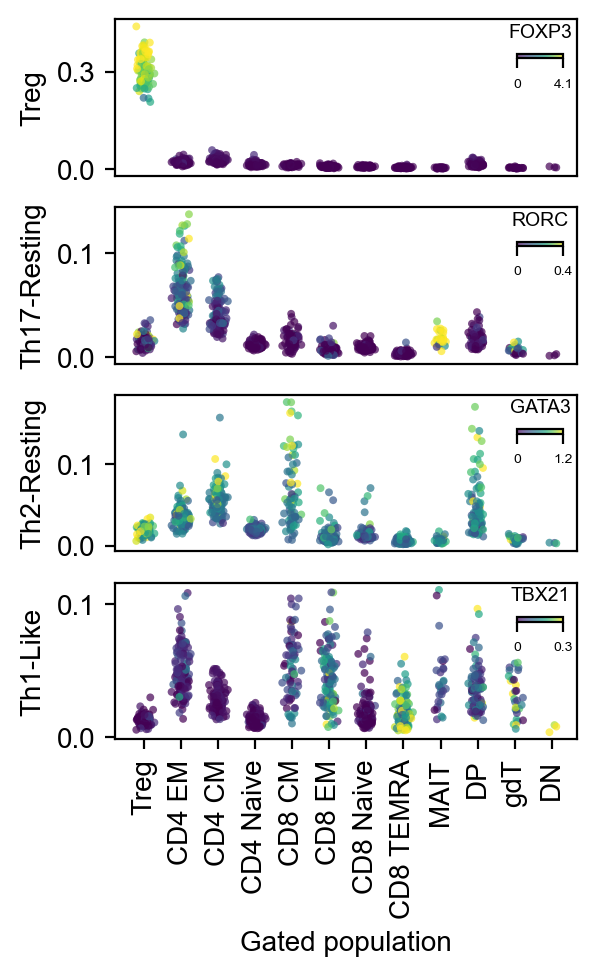

In [ ]:
sample_average = sample_sum.copy()
sample_average['pos'] = sample_average['gating'].replace(posmap)
sample_average['pos_jitter'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.1

vals = [['FOXP3', 'Treg', .87, .75],
          ['RORC', 'Th17-Resting', .87, .75],
          ['GATA3', 'Th2-Resting', .87, .75],
         ['TBX21', 'Th1-Like', .87, .75]]

fig,axes = plt.subplots(4, 1, figsize=(3,5), dpi=200, gridspec_kw={'top':.97, 'bottom':.25, 'left':.2, 'right':.97})
for i,(gene, gep, legleft, legbot) in enumerate(vals):
    vmax = np.quantile(sample_average[gene], .975)
    ax = axes[i]
    scim = ax.scatter(sample_average['pos_jitter'], sample_average[gep], c=sample_average[gene], vmin=0, vmax=vmax,
            s=8, edgecolor='None', alpha=.7)
    #sns.boxplot(x='pos', y=gep, data=sample_average, ax=ax, fliersize=0, showcaps=False, 
    #        showfliers=False, whiskerprops={'linewidth':.5}, boxprops={'facecolor':'None', 'linewidth':.5}, 
    #        medianprops={'color':'black', 'linewidth':.5}, zorder=5)

    ax.set_ylabel(gep, fontsize=10)
    
    if i == 0:
        ax.set_yticks([0, .3])
    else:
        ax.set_yticks([0, .1])

    if i == (len(axes)-1):
        ax.set_xticks(np.arange(len(order)))
        ax.set_xticklabels([x.replace('_', ' ') for x in order], rotation=90)
        ax.set_xlabel('Gated population', fontsize=10)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])

    cax = ax.inset_axes([legleft, legbot, .1, .03], transform=ax.transAxes)
    cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
    cax.tick_params(labelsize=5)
    cax.set_xticklabels(['0', '%.1f' % vmax])
    cax.set_title(gene, fontsize=7)
    
# plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Stripplot.png'))
# plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Stripplot.pdf'))

In [ ]:
for lin in order:
    T,P = ttest_ind(sample_average.loc[sample_average['gating'] == lin, 'Th2-Resting'], 
          sample_average.loc[sample_average['gating'] != lin, 'Th2-Resting'])
    if T > 0:
        print(lin, T, P)

CD4_EM 3.913640651606685 9.659247408905932e-05
CD4_CM 14.442757769409612 2.2819430280095534e-43
CD8_CM 13.969676509525833 6.763957115127154e-41
DP 7.648153353006088 4.48929330715306e-14


In [ ]:
for lin in order:
    T,P = ttest_ind(sample_average.loc[sample_average['gating'] == lin, 'Th1-Like'], 
          sample_average.loc[sample_average['gating'] != lin, 'Th1-Like'])
    if T > 0:
        print(lin, T, P)

CD4_EM 12.898747106884407 1.6351184017388422e-35
CD8_CM 9.75974665592415 1.2668834715053677e-21
CD8_EM 8.495093590349995 6.464947513066694e-17
MAIT 3.277777676522424 0.0010795514563559587
DP 3.121167628017894 0.0018490915430071958
gdT 0.15137595817100838 0.8797073712446704


In [ ]:
from scipy.stats import ttest_ind
ttest_ind(sample_average.loc[sample_average['gating'] == 'CD4_EM', 'Th17-Resting'], 
          sample_average.loc[sample_average['gating'] != 'CD4_EM', 'Th17-Resting'])

Ttest_indResult(statistic=37.485336789394715, pvalue=8.923613032320311e-198)

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(sample_average.loc[sample_average['gating'] == 'CD4_CM', 'Th17-Resting'], 
          sample_average.loc[sample_average['gating'] != 'CD4_CM', 'Th17-Resting'])

Ttest_indResult(statistic=11.05270588784744, pvalue=5.552243879809728e-27)

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(sample_average.loc[sample_average['gating'] == 'MAIT', 'Th17-Resting'], 
          sample_average.loc[sample_average['gating'] != 'MAIT', 'Th17-Resting'])

Ttest_indResult(statistic=-0.920946558833402, pvalue=0.35728361348642557)

In [ ]:
order = ['DN',
 'gdT',
 'DP',
 'MAIT',
 'CD8_TEMRA',
 'CD8_Naive',
 'CD8_EM',
 'CD8_CM',
 'CD4_Naive',
 'CD4_CM',
 'CD4_EM',
 'Treg']

posmap = dict(zip(order, np.arange(len(order))))
posmap

{'DN': 0,
 'gdT': 1,
 'DP': 2,
 'MAIT': 3,
 'CD8_TEMRA': 4,
 'CD8_Naive': 5,
 'CD8_EM': 6,
 'CD8_CM': 7,
 'CD4_Naive': 8,
 'CD4_CM': 9,
 'CD4_EM': 10,
 'Treg': 11}

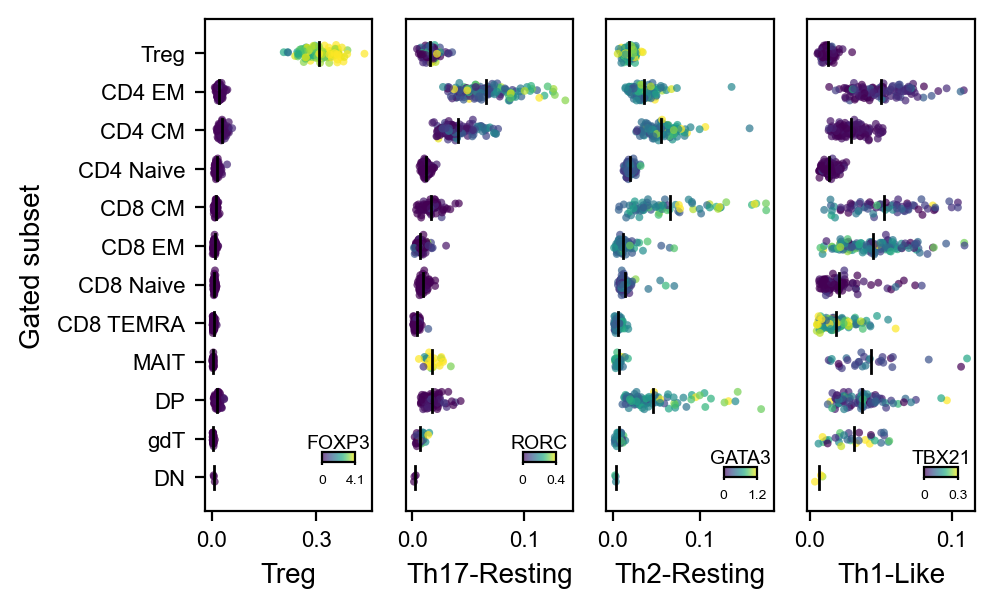

In [ ]:
sample_average = sample_sum.copy()
sample_average['pos'] = sample_average['gating'].replace(posmap)
sample_average['pos_jitter'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.1

vals = [['FOXP3', 'Treg', .7, .1],
          ['RORC', 'Th17-Resting', .7, .1],
          ['GATA3', 'Th2-Resting', .7, .07],
         ['TBX21', 'Th1-Like', .7, .07]]

fig,axes = plt.subplots(1, 4, figsize=(5,3), dpi=200, gridspec_kw={'top':.97, 'bottom':.15, 'left':.2, 'right':.97})
for i,(gene, gep, legleft, legbot) in enumerate(vals):
    vmax = np.quantile(sample_average[gene], .975)
    ax = axes[i]
    scim = ax.scatter(sample_average[gep], sample_average['pos_jitter'], c=sample_average[gene], vmin=0, vmax=vmax,
            s=8, edgecolor='None', alpha=.7)
    
    for j, lin in enumerate(order):
        mean_lin = sample_average[gep].groupby(sample_average['gating']).mean()[lin]
        ax.plot([mean_lin, mean_lin], [j - 0.3, j + 0.3], color = 'black', lw = 1)
        
    ax.set_xlabel(gep, fontsize=10)
    ax.tick_params(labelsize=8)
        
    if i == 0:
        ax.set_xticks([0, .3])
        ax.set_ylabel('Gated subset', fontsize=10)
        ax.set_yticks(np.arange(len(order)))
        ax.set_yticklabels([x.replace('_', ' ') for x in order], fontsize=8)
    else:
        ax.set_xticks([0, .1])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel('')

    cax = ax.inset_axes([legleft, legbot, .2, .02], transform=ax.transAxes)
    cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
    cax.tick_params(labelsize=5, length=1)
    cax.set_xticklabels(['0', '%.1f' % vmax])
    cax.set_title(gene, fontsize=7, pad=0)
    
#plt.figtext(0.59, 0.05, 'Average GEP Usage', fontsize=10, ha='center', va='center')
    
plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Stripplot.png'))
plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Stripplot.pdf'))

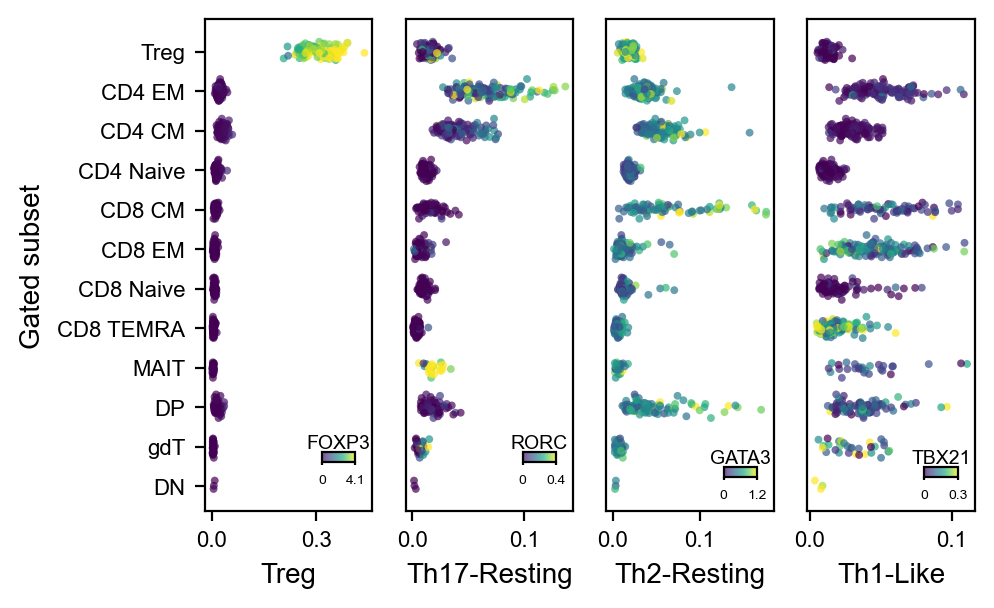

In [ ]:
sample_average = sample_sum.copy()
sample_average['pos'] = sample_average['gating'].replace(posmap)
sample_average['pos_jitter'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.1

vals = [['FOXP3', 'Treg', .7, .1],
          ['RORC', 'Th17-Resting', .7, .1],
          ['GATA3', 'Th2-Resting', .7, .07],
         ['TBX21', 'Th1-Like', .7, .07]]

fig,axes = plt.subplots(1, 4, figsize=(5,3), dpi=200, gridspec_kw={'top':.97, 'bottom':.15, 'left':.2, 'right':.97})
for i,(gene, gep, legleft, legbot) in enumerate(vals):
    vmax = np.quantile(sample_average[gene], .975)
    ax = axes[i]
    scim = ax.scatter(sample_average[gep], sample_average['pos_jitter'], c=sample_average[gene], vmin=0, vmax=vmax,
            s=8, edgecolor='None', alpha=.7)
    #sns.boxplot(x='pos', y=gep, data=sample_average, ax=ax, fliersize=0, showcaps=False, 
    #        showfliers=False, whiskerprops={'linewidth':.5}, boxprops={'facecolor':'None', 'linewidth':.5}, 
    #        medianprops={'color':'black', 'linewidth':.5}, zorder=5)

    ax.set_xlabel(gep, fontsize=10)
    ax.tick_params(labelsize=8)
        
    if i == 0:
        ax.set_xticks([0, .3])
        ax.set_ylabel('Gated subset', fontsize=10)
        ax.set_yticks(np.arange(len(order)))
        ax.set_yticklabels([x.replace('_', ' ') for x in order], fontsize=8)
    else:
        ax.set_xticks([0, .1])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel('')

    cax = ax.inset_axes([legleft, legbot, .2, .02], transform=ax.transAxes)
    cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
    cax.tick_params(labelsize=5, length=1)
    cax.set_xticklabels(['0', '%.1f' % vmax])
    cax.set_title(gene, fontsize=7, pad=0)
    
#plt.figtext(0.59, 0.05, 'Average GEP Usage', fontsize=10, ha='center', va='center')
    
# plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Stripplot.png'))
# plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Stripplot.pdf'))

(0.31288725266256595, 0.0002324469737563589)

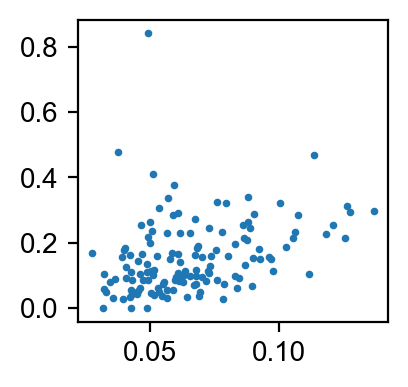

In [ ]:
(fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
gene = 'RORC'
gep = 'Th17-Resting'
lin = 'CD4_EM'
ind = sample_average['gating']==lin
ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])

(0.4311723801882565, 1.9832292010053585e-07)

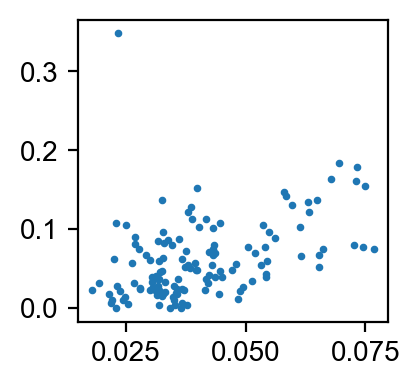

In [ ]:
(fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
gene = 'RORC'
gep = 'Th17-Resting'
lin = 'CD4_CM'
ind = sample_average['gating']==lin
ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])

0.3298077548948194 9.962947392599637e-05 CD4_CM
0.4207653219528377 0.00023301816351404273 CD8_CM
0.4275255213704012 1.9181225333549534e-05 DP
0.13665284044927997 0.11538429690442703 CD4_EM


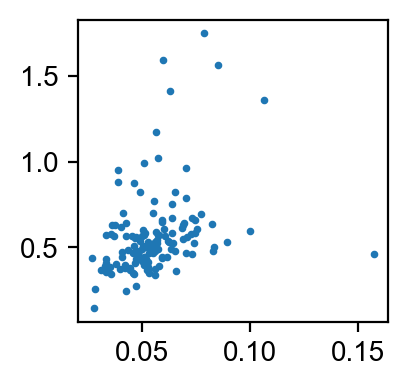

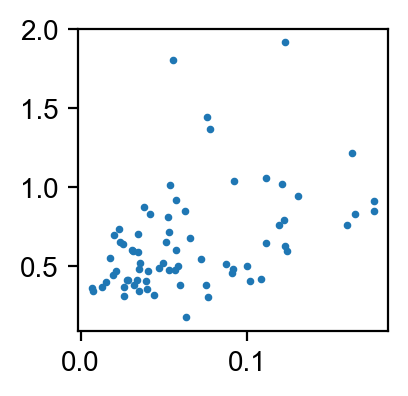

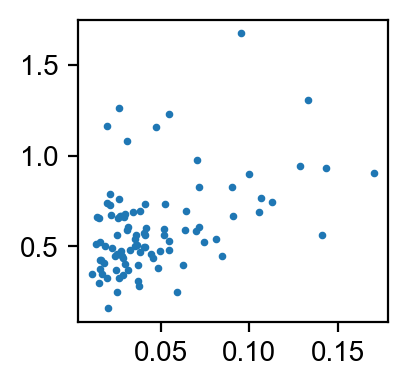

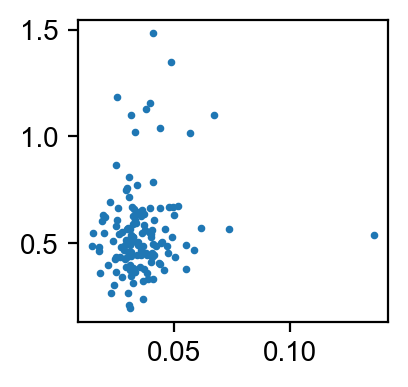

In [ ]:
for lin in ['CD4_CM', 'CD8_CM', 'DP', 'CD4_EM']:
    (fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
    gene = 'GATA3'
    gep = 'Th2-Resting'
    ind = sample_average['gating']==lin
    ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
    R,P = pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])
    print(R,P,lin)
                   

0.20239590980980746 0.019012847405871294 CD4_EM
-0.12299672968652889 0.30333363718280065 CD8_CM
-0.3141484881893508 0.00038061376781421723 CD8_EM
0.017846286970507032 0.9281797880743509 MAIT
0.19173782525570238 0.06559707457080079 DP


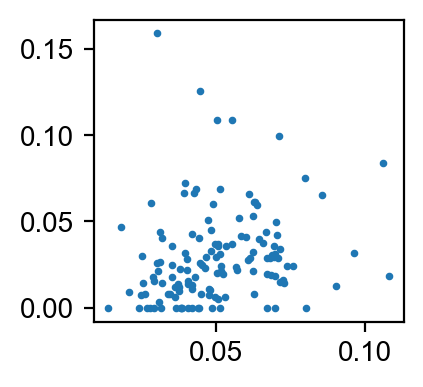

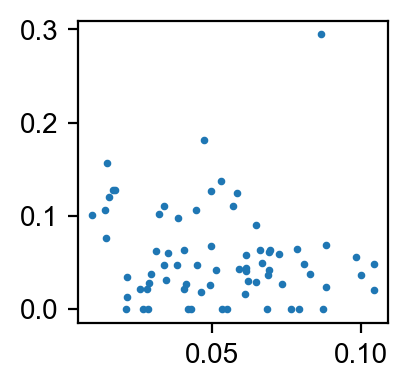

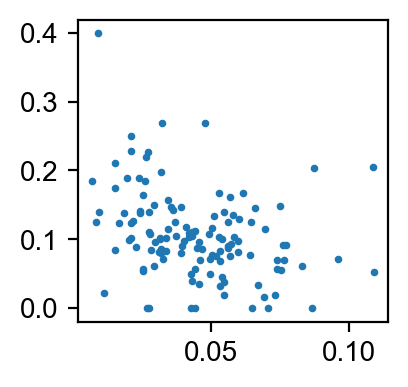

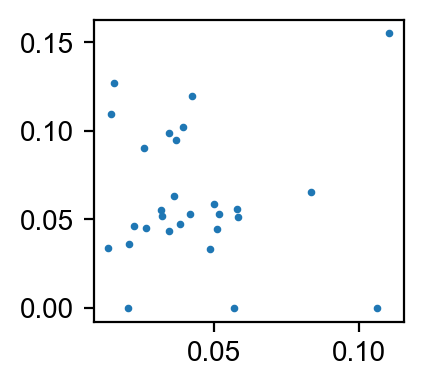

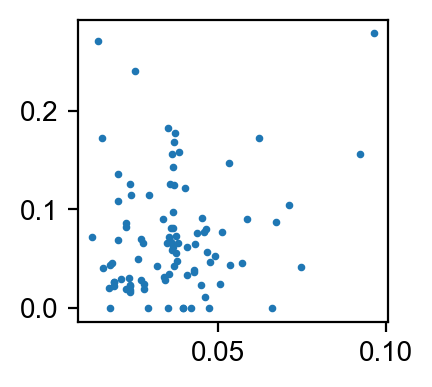

In [ ]:
for lin in ['CD4_EM', 'CD8_CM', 'CD8_EM', 'MAIT', 'DP']:
    (fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
    gene = 'TBX21'
    gep = 'Th1-Like'
    ind = sample_average['gating']==lin
    ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
    R,P = pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])
    print(R,P,lin)


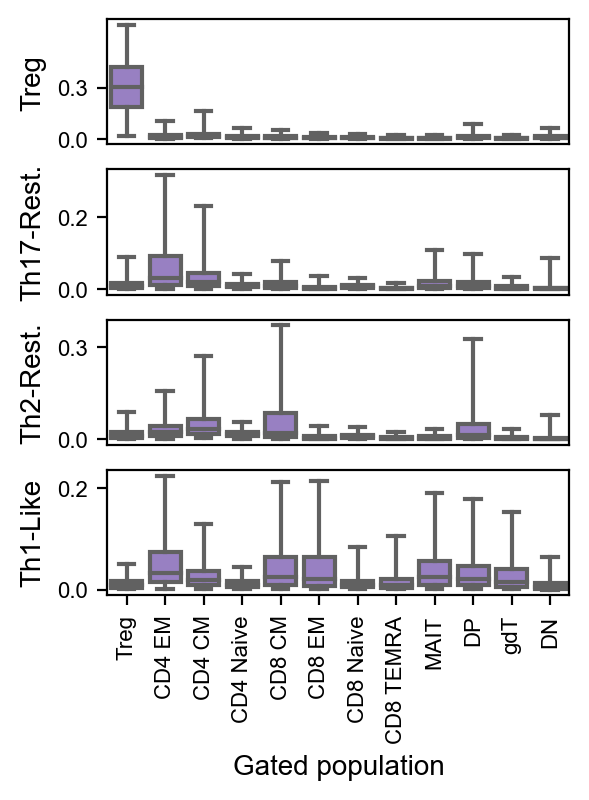

In [ ]:
order = [ 'Treg',
 'CD4_EM',
 'CD4_CM',
 'CD4_Naive',
 'CD8_CM',
 'CD8_EM',
 'CD8_Naive',
 'CD8_TEMRA',
 'MAIT',
 'DP',
 'gdT',
'DN',
        ]


posmap = dict(zip(order, np.arange(len(order))))
posmap

fig,axes = plt.subplots(4, 1, figsize=(3,4), dpi=200, gridspec_kw={'top':.97, 'bottom':.25, 'left':.2, 'right':.97})
for i,(gene, gep, legleft, legbot) in enumerate(vals):
    vmax = np.quantile(sample_average[gene], .975)
    ax = axes[i]
    sns.boxplot(x='gating', y=gep, data=X, ax=ax, showfliers=False, order=order, whis=(2.5, 97.5),
               color='#9575cd')

    ax.set_ylabel(gep.replace('Resting', 'Rest.'), fontsize=10)
    
    if i in [0, 2]:
        ax.set_yticks([0, .3])

    if i == (len(axes)-1):
        ax.set_xticks(np.arange(len(order)))
        ax.set_xticklabels([x.replace('_', ' ') for x in order], rotation=90)
        ax.set_xlabel('Gated population', fontsize=10)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_xlabel('')
        
    ax.tick_params(labelsize=8)

plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Boxplot.png'))
plt.savefig(os.path.join(figdir, 'PolarizationVsGating.COMBAT.Boxplot.pdf'))

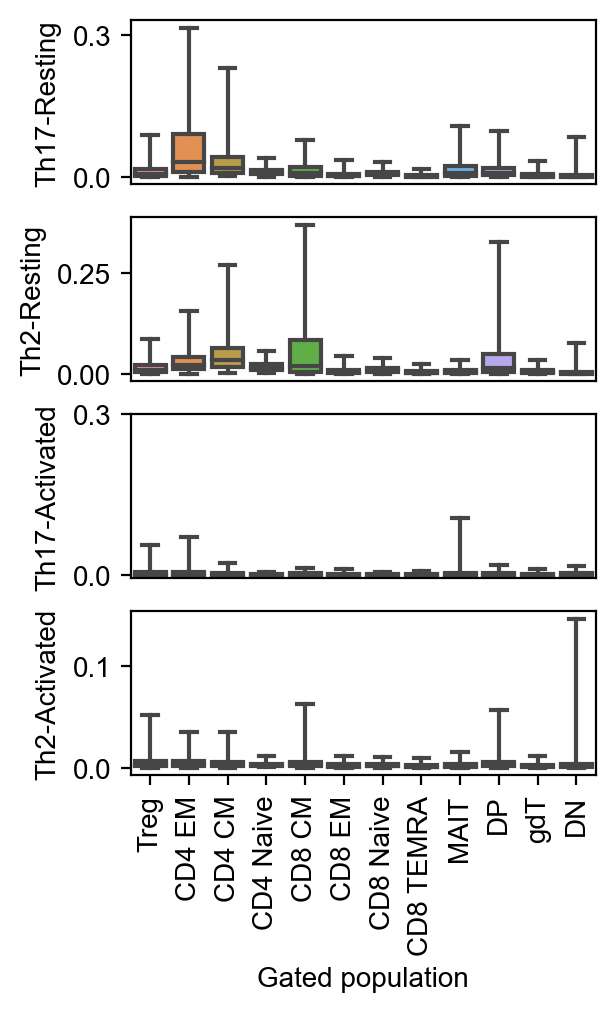

In [ ]:

vals = [  ['RORC', 'Th17-Resting', .85, .75],
          ['GATA3', 'Th2-Resting', .85, .75],
         ['RORC', 'Th17-Activated', .85, .75],
        ['GATA3', 'Th2-Activated', .85, .75],
]

fig,axes = plt.subplots(4, 1, figsize=(3,5), dpi=200)
for i,(gene, gep, legleft, legbot) in enumerate(vals):
    vmax = np.quantile(sample_average[gene], .975)
    ax = axes[i]
    sns.boxplot(x='gating', y=gep, data=X, ax=ax, showfliers=False, order=order, whis=(2.5, 97.5))

    ax.set_ylabel(gep, fontsize=10)
    
    if i in [0, 2]:
        ax.set_yticks([0, .3])

    if i == (len(axes)-1):
        ax.set_xticks(np.arange(len(order)))
        ax.set_xticklabels([x.replace('_', ' ') for x in order], rotation=90)
        ax.set_xlabel('Gated population', fontsize=10)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_xlabel('')

    '''
    cax = ax.inset_axes([legleft, legbot, .1, .03], transform=ax.transAxes)
    cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
    cax.tick_params(labelsize=5)
    cax.set_xticklabels(['0', '%.1f' % vmax])
    cax.set_title(gene, fontsize=7)
    '''

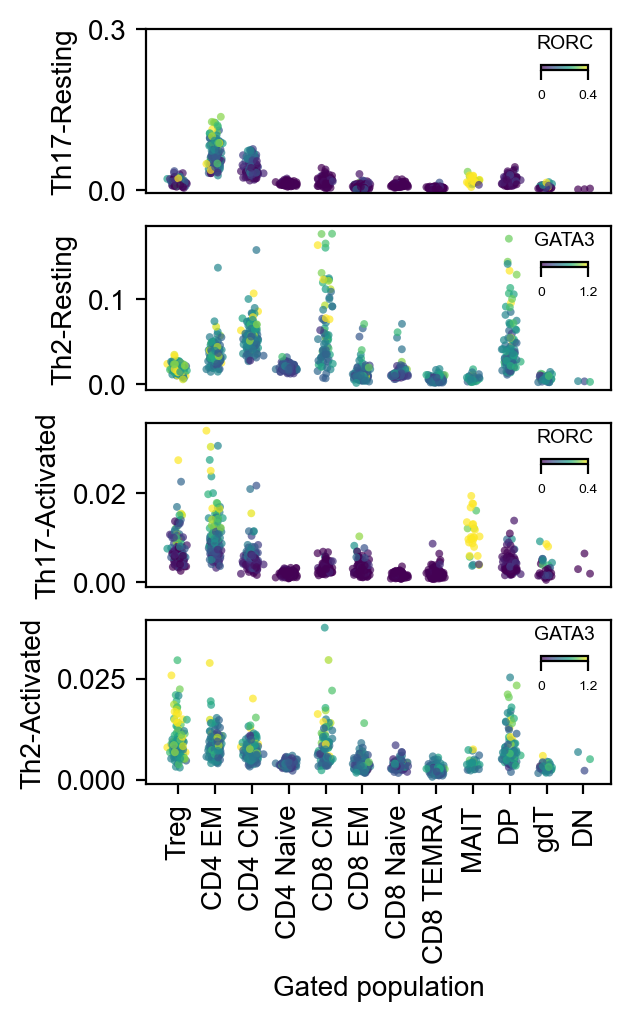

In [ ]:
sample_average = sample_sum.copy()
sample_average['pos'] = sample_average['gating'].replace(posmap)
sample_average['pos'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.1

vals = [  ['RORC', 'Th17-Resting', .85, .75],
          ['GATA3', 'Th2-Resting', .85, .75],
         ['RORC', 'Th17-Activated', .85, .75],
        ['GATA3', 'Th2-Activated', .85, .75],
]

fig,axes = plt.subplots(4, 1, figsize=(3,5), dpi=200)
for i,(gene, gep, legleft, legbot) in enumerate(vals):
    vmax = np.quantile(sample_average[gene], .975)
    ax = axes[i]
    scim = ax.scatter(sample_average['pos'], sample_average[gep], c=sample_average[gene], vmin=0, vmax=vmax,
            s=8, edgecolor='None', alpha=.7)

    ax.set_ylabel(gep, fontsize=10)
    
    if i == 0:
        ax.set_yticks([0, .3])

    if i == (len(axes)-1):
        ax.set_xticks(np.arange(len(order)))
        ax.set_xticklabels([x.replace('_', ' ') for x in order], rotation=90)
        ax.set_xlabel('Gated population', fontsize=10)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])

    cax = ax.inset_axes([legleft, legbot, .1, .03], transform=ax.transAxes)
    cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
    cax.tick_params(labelsize=5)
    cax.set_xticklabels(['0', '%.1f' % vmax])
    cax.set_title(gene, fontsize=7)

In [ ]:
X

,Th1-Like,Treg,Th2-Resting,Th17-Resting,Th22,Th2-Activated,Th17-Activated,Dataset,gating,individual,...,CCR4,CCR6,CXCR3,AHR,IL4,IL5,IL13,IL17A,IL17F,IFNG
AAACCTGAGCGGATCA-1-gPlexA1,0.002831,0.034980,0.006579,0.010255,3.271008e-02,0.012793,0.010395,COMBAT,CD8_EM,S00112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGCTCGAC-1-gPlexA1,0.024661,0.007576,0.032989,0.029651,7.625121e-02,0.004483,0.000709,COMBAT,CD4_CM,S00005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATCTATGG-1-gPlexA1,0.122923,0.013905,0.012643,0.007051,7.632461e-03,0.000425,0.004489,COMBAT,CD4_EM,H00067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCTCTCTG-1-gPlexA1,0.038078,0.061110,0.010558,0.066082,1.687358e-02,0.009539,0.002882,COMBAT,CD4_CM,N00027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCACCGGGT-1-gPlexA1,0.002457,0.007651,0.003494,0.001061,2.505686e-03,0.002320,0.002294,COMBAT,CD8_TEMRA,U00515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCTCAACC-1-gPlexK7,0.014436,0.024623,0.034682,0.010187,8.667998e-03,0.007406,0.001145,COMBAT,CD4_Naive,S00048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCTCGATGA-1-gPlexK7,0.004975,0.022743,0.010241,0.011276,5.804639e-03,0.001801,0.003420,COMBAT,CD4_CM,N00038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACACCACGTG-1-gPlexK7,0.000998,0.001061,0.000213,0.000360,1.518015e-04,0.000715,0.000919,COMBAT,CD8_TEMRA,S00057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTACCGAT-1-gPlexK7,0.063261,0.004459,0.008173,0.010838,4.109498e-03,0.000899,0.000812,COMBAT,CD8_EM,U00501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
! ls ../../Figures/Components

AccuracyBarplot_SparksGating.pdf
AccuracyBarplot_SparksGating.png
Activation_CellCyle_Corr+OddsRatio.pdf
Activation_CellCyle_Corr+OddsRatio.png
AIM_Markers_GEPs.Boxplot.pdf
AIM_Markers_GEPs.Boxplot.png
AllGep_PairwiseCorr_Heatmap.pdf
AllGep_PairwiseCorr_Heatmap.png
AMPRA.20230912.k_selection.png
Archive
AUCBarplot_SparksGating.pdf
AUCBarplot_SparksGating.png
AUCBarplot_SparksGating_Yasumizu.pdf
AUCBarplot_SparksGating_Yasumizu.png
AUCScatterplot_ActivationScore_StepwiseSelection.pdf
AUCScatterplot_ActivationScore_StepwiseSelection.png
Barplot_PctProlifByLineage_COMBAT.pdf
Barplot_PctProlifByLineage_COMBAT.png
Barplot_PctProlifByLineage_Stacked_COMBAT.pdf
Barplot_PctProlifByLineage_Stacked_COMBAT.png
Barplot_PctProlifByLineage_Stacked_UKCovidANDcombat.pdf
Barplot_PctProlifByLineage_Stacked_UKCovidANDcombat.png
Barplot_PctProlifByLineage_Stacked_UKCovid.pdf
Barplot_PctProlifByLineage_Stacked_UKCovid.png
Barplot_PctProlifByLineage_UKCovidANDcombat.pdf
Barplot_PctProlifByLineage_UKCovidAND

Text(0.5, 1.0, 'FOXP3')

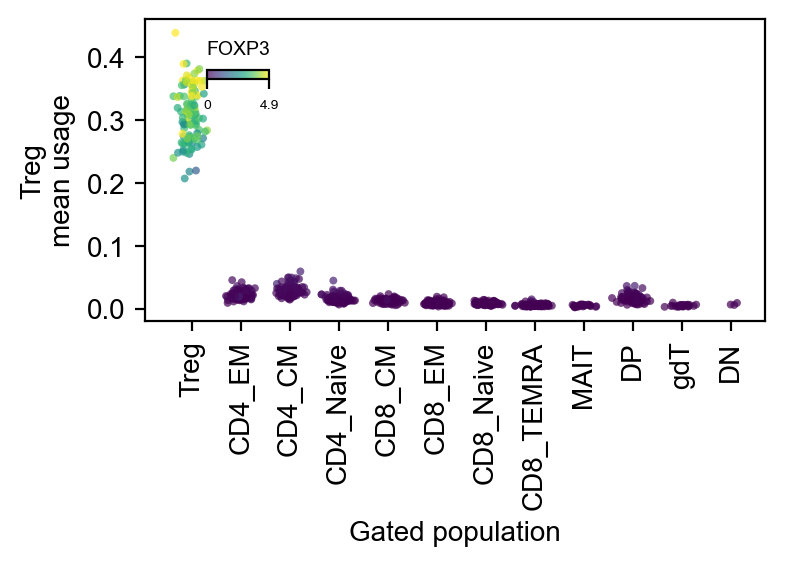

In [ ]:
sample_average = sample_sum.copy()
posmap = dict(zip(order, np.arange(len(order))))
sample_average['pos'] = sample_average['gating'].replace(posmap)
sample_average['pos'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.13

gene = 'FOXP3'
gep = 'Treg'

(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
vmax = np.quantile(sample_average[gene], .99)
scim = ax.scatter(sample_average['pos'], sample_average[gep], c=sample_average[gene], vmin=0, vmax=vmax,
            s=8, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)
ax.set_ylabel('%s\nmean usage' % gep, fontsize=10)
ax.set_xlabel('Gated population', fontsize=10)

cax = ax.inset_axes([.1, .8, .1, .03], transform=ax.transAxes)
cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
cax.tick_params(labelsize=5)
cax.set_xticklabels(['0', '%.1f' % vmax])
cax.set_title(gene, fontsize=7)

Text(0.5, 1.0, 'GATA3')

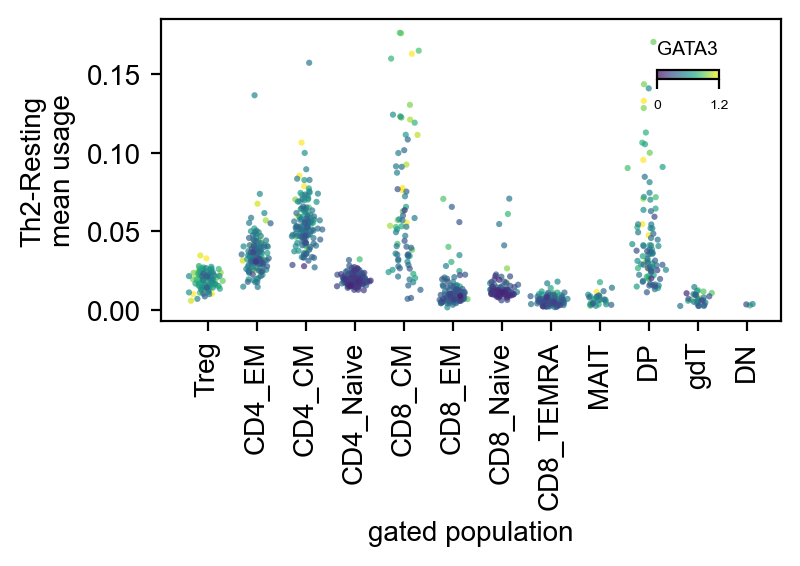

In [ ]:
(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
gene = 'GATA3'
gep = 'Th2-Resting'
Z = sample_average.sort_values(by=gene, ascending=False)
vmax = np.quantile(sample_average[gene], .975)
scim = ax.scatter(Z['pos'], Z[gep], c=Z[gene], vmin=0, vmax=vmax,
            s=5, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)
ax.set_ylabel('%s\nmean usage' % gep, fontsize=10)
ax.set_xlabel('gated population', fontsize=10)

cax = ax.inset_axes([.8, .8, .1, .03], transform=ax.transAxes)
cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
cax.tick_params(labelsize=5)
cax.set_xticklabels(['0', '%.1f' % vmax])
cax.set_title(gene, fontsize=7)

Text(0.5, 1.0, 'RORC')

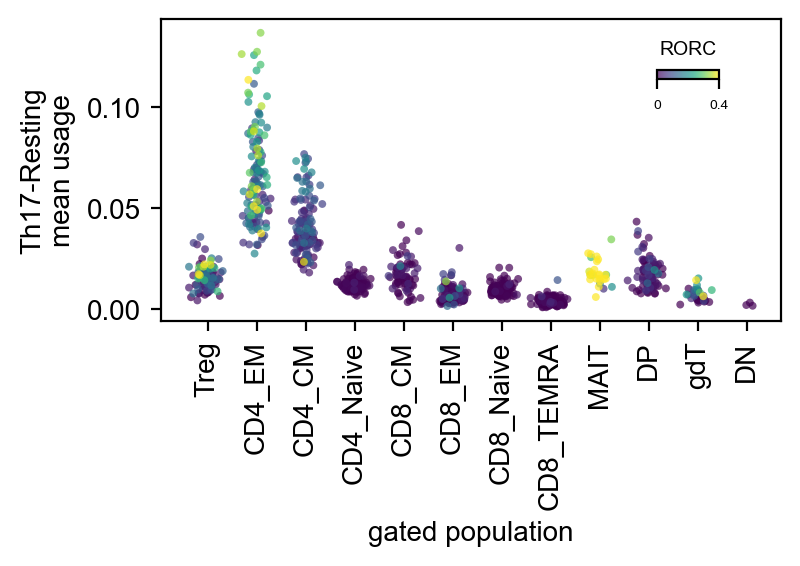

In [ ]:
(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
gene = 'RORC'
gep = 'Th17-Resting'
Z = sample_average.sort_values(by=gene)
vmax = np.quantile(sample_average[gene], .975)
scim = ax.scatter(Z['pos'], Z[gep].values, c=Z[gene].values, vmin=np.quantile(sample_average[gene], 0), vmax=vmax,
            s=8, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)
ax.set_ylabel('%s\nmean usage' % gep, fontsize=10)
ax.set_xlabel('gated population', fontsize=10)

cax = ax.inset_axes([.8, .8, .1, .03], transform=ax.transAxes)
cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
cax.tick_params(labelsize=5)
cax.set_xticklabels(['0', '%.1f' % vmax])
cax.set_title(gene, fontsize=7)

Text(0.5, 1.0, 'AHR')

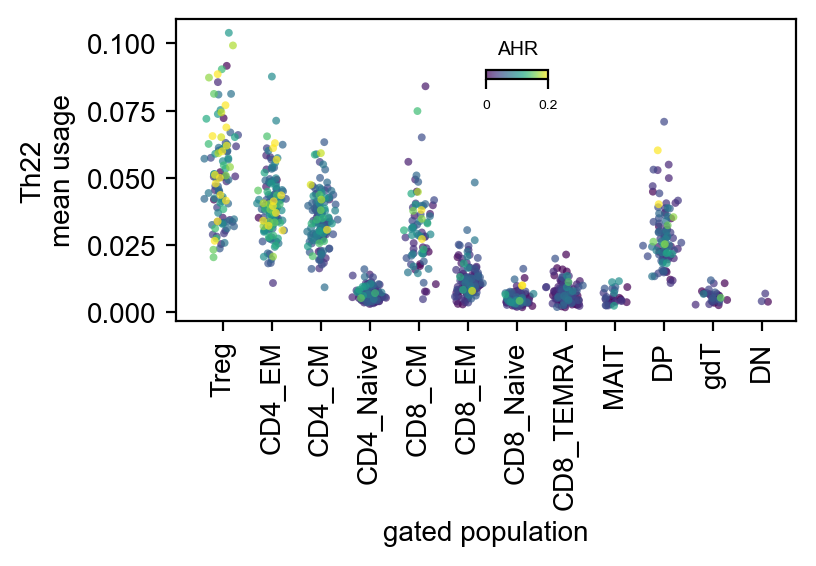

In [ ]:
(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
gene = 'AHR'
gep = 'Th22'
Z = sample_average.sort_values(by=gene)
vmax = np.quantile(sample_average[gene], .975)
scim = ax.scatter(Z['pos'], Z[gep].values, c=Z[gene].values, vmin=np.quantile(sample_average[gene], 0), vmax=vmax,
            s=8, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)
ax.set_ylabel('%s\nmean usage' % gep, fontsize=10)
ax.set_xlabel('gated population', fontsize=10)

cax = ax.inset_axes([.5, .8, .1, .03], transform=ax.transAxes)
cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
cax.tick_params(labelsize=5)
cax.set_xticklabels(['0', '%.1f' % vmax])
cax.set_title(gene, fontsize=7)

Text(0.12, 1.5, 'R=0.42')

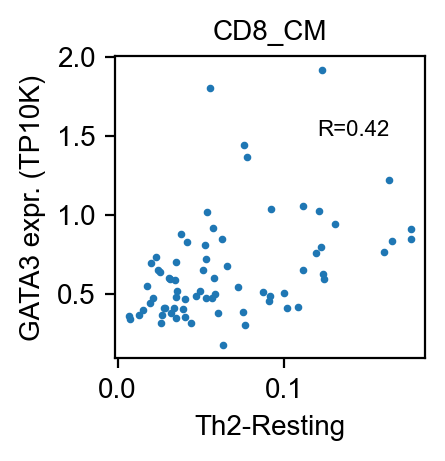

In [ ]:
(fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
gene = 'GATA3'
gep = 'Th2-Resting'
lin = 'CD8_CM'
ind = sample_average['gating']==lin
ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
R, P = pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])
ax.set_xlabel(gep, fontsize=10)
ax.set_ylabel(gene + ' expr. (TP10K)', fontsize=10)
ax.set_title(lin, fontsize=10)
ax.text(.12, 1.5, 'R=%.2f' % R, fontsize=8)

Text(0.12, 1.5, 'R=0.33')

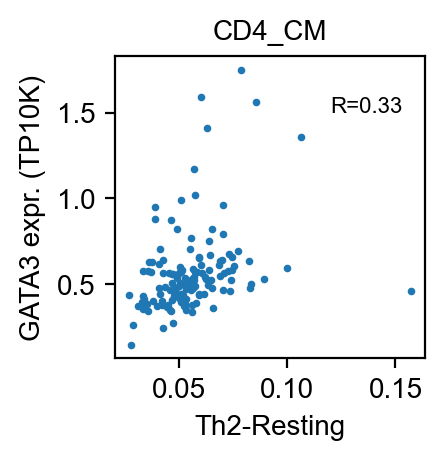

In [ ]:
(fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
gene = 'GATA3'
gep = 'Th2-Resting'
lin = 'CD4_CM'
ind = sample_average['gating']==lin
ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
R, P = pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])
ax.set_xlabel(gep, fontsize=10)
ax.set_ylabel(gene + ' expr. (TP10K)', fontsize=10)
ax.set_title(lin, fontsize=10)
ax.text(.12, 1.5, 'R=%.2f' % R, fontsize=8)

(0.31288725266256595, 0.0002324469737563589)

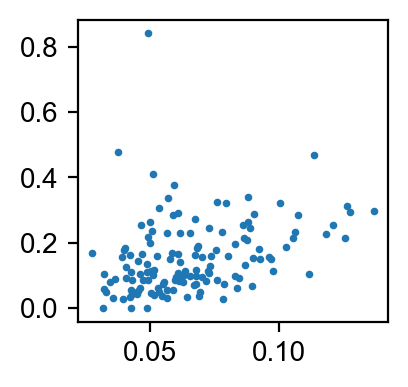

In [ ]:
(fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
gene = 'RORC'
gep = 'Th17-Resting'
lin = 'CD4_EM'
ind = sample_average['gating']==lin
ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])

(0.4311723801882565, 1.9832292010053585e-07)

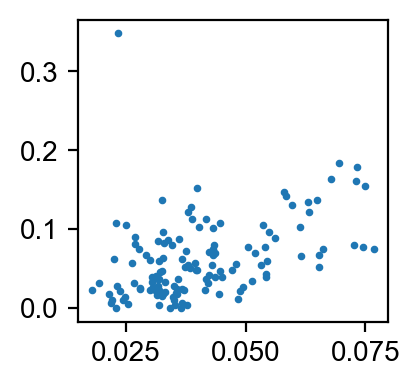

In [ ]:
(fig,ax) = plt.subplots(1,1 ,figsize=(2,2), dpi=200)
gene = 'RORC'
gep = 'Th17-Resting'
lin = 'CD4_CM'
ind = sample_average['gating']==lin
ax.scatter(sample_average.loc[ind, gep], sample_average.loc[ind, gene], s=3)
pearsonr(sample_average.loc[ind, gep], sample_average.loc[ind, gene])

Text(0.5, 1.0, 'TBX21')

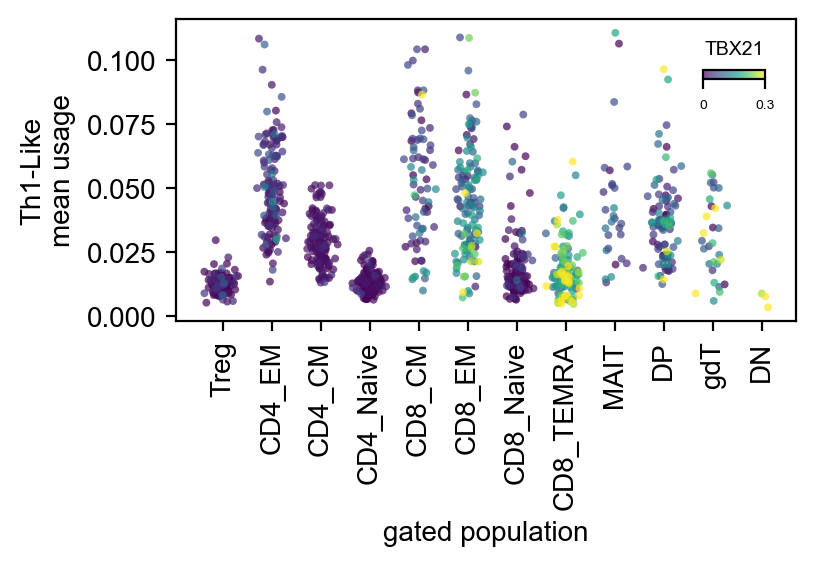

In [ ]:
(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
gene = 'TBX21'
gep = 'Th1-Like'
Z = sample_average.sort_values(by=gene)
vmax = np.quantile(sample_average[gene], .975)
scim = ax.scatter(Z['pos'], Z[gep].values, c=Z[gene].values, vmin=np.quantile(sample_average[gene], 0), vmax=vmax,
            s=8, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)
ax.set_ylabel('%s\nmean usage' % gep, fontsize=10)
ax.set_xlabel('gated population', fontsize=10)

cax = ax.inset_axes([.85, .8, .1, .03], transform=ax.transAxes)
cb = fig.colorbar(scim, ax=ax, cax=cax, orientation='horizontal', ticks=[0, vmax])
cax.tick_params(labelsize=5)
cax.set_xticklabels(['0', '%.1f' % vmax])
cax.set_title(gene, fontsize=7)

In [ ]:
sample_average

,sample,gating,Th1-Like,Treg,Th2-Resting,Th17-Resting,Th22,Th2-Activated,Th17-Activated,N,...,CXCR3,AHR,IL4,IL5,IL13,IL17A,IL17F,IFNG,Ncell,pos
0,G05061-Ja005,CD4_CM,0.021598,0.037634,0.049289,0.033122,0.031425,0.009690,0.003511,3011626.0,...,0.245714,0.092973,0.006641,0.003320,0.009961,0.0,0.0,0.066409,756,1.998760
1,G05061-Ja005,CD4_EM,0.051548,0.025952,0.024941,0.065505,0.037024,0.006960,0.004569,1224505.0,...,0.481827,0.155165,0.000000,0.000000,0.000000,0.0,0.0,0.073499,337,1.036027
2,G05061-Ja005,CD4_Naive,0.010977,0.019363,0.016132,0.011943,0.004833,0.004342,0.001599,2860454.0,...,0.055935,0.031464,0.000000,0.000000,0.003496,0.0,0.0,0.006992,825,3.080701
4,G05061-Ja005,CD8_CM,0.049878,0.017185,0.038227,0.011946,0.033081,0.011149,0.002004,296817.0,...,0.842270,0.134763,0.000000,0.000000,0.000000,0.0,0.0,0.303217,66,4.169877
5,G05061-Ja005,CD8_EM,0.049705,0.009637,0.007061,0.008982,0.008002,0.003598,0.001351,838031.0,...,0.811426,0.202856,0.011933,0.000000,0.000000,0.0,0.0,0.465377,267,5.082572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,U00619-Ua005,CD8_TEMRA,0.004940,0.002955,0.002100,0.001181,0.004462,0.000984,0.001791,372367.0,...,0.698236,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.214842,95,6.906511
1779,U00619-Ua005,Treg,0.005340,0.438399,0.005792,0.005760,0.071950,0.008269,0.005957,541649.0,...,1.587744,0.129235,0.000000,0.018462,0.000000,0.0,0.0,0.018462,132,-0.341901
1782,U00701-Ua005,CD4_EM,0.070160,0.008878,0.014738,0.032848,0.035192,0.007132,0.007364,200499.0,...,0.399004,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.149627,59,0.724430
1786,U00701-Ua005,CD8_EM,0.064245,0.004617,0.011252,0.006289,0.010941,0.003495,0.002635,387774.0,...,1.005740,0.025788,0.000000,0.000000,0.000000,0.0,0.0,0.232094,119,5.096993


In [ ]:
sample_average = X.groupby(['sample', 'gating']).mean().reset_index().dropna()
sample_average['pos'] = sample_average['gating'].replace(dict(zip(order, np.arange(len(order)))))
sample_average['pos'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.1

(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
ax.scatter(sample_average['pos'], sample_average['Treg'], c=sample_average['FOXP3'], vmin=0, vmax=np.quantile(sample_average['FOXP3'], .99),
            s=8, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)

TypeError: can only concatenate str (not "float") to str

In [ ]:
sample_average = X.groupby(['sample', 'gating']).mean().reset_index().dropna()
sample_average['pos'] = sample_average['gating'].replace(dict(zip(order, np.arange(len(order)))))
sample_average['pos'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.15

(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
ax.scatter(sample_average['pos'], sample_average['Th17-Resting'], c=sample_average['RORC'], vmin=0, vmax=np.quantile(sample_average['RORC'], .99),
            s=8, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)

In [ ]:
sample_average = X.groupby(['sample', 'gating']).mean().reset_index().dropna()
sample_average['pos'] = sample_average['gating'].replace(dict(zip(order, np.arange(len(order)))))
sample_average['pos'] = sample_average['pos'] +np.random.randn(sample_average.shape[0])*.15

(fig,ax) = plt.subplots(1, 1, figsize=(4,2), dpi=200)
ax.scatter(sample_average['pos'], sample_average['Th2-Resting'], c=sample_average['GATA3'], vmin=0, vmax=np.quantile(sample_average['GATA3'], .99),
            s=8, edgecolor='None', alpha=.7)

ax.set_xticks(np.arange(len(order)))
ax.set_xticklabels(order, rotation=90)

In [ ]:
len(order)

In [ ]:
sample_average

In [ ]:
X['Treg_Bin'] = (X['Treg']>0.1).replace({True:'Treg-high', False:'Treg-low'})
X['Th2_Bin'] = (X['Th2-Resting']>0.1).replace({True:'Th2-high', False:'Th2-low'})
X['Th17_Bin'] = (X['Th17-Resting']>0.1).replace({True:'Th17-high', False:'Th17-low'})
X['Th1_Bin'] = (X['Th1-Like']>0.1).replace({True:'Th1-high', False:'Th1-low'})

In [ ]:
usage.columns

In [ ]:
sample_average = X.groupby(['sample', 'gating', 'Treg_Bin']).sum().reset_index().dropna()
order = sorted(sample_average['gating'].unique())
ax = sns.stripplot(x='gating', y='FOXP3', hue='Treg_Bin', data=sample_average, dodge=True, order=order)
ax.set_xticklabels(order, rotation=90)

In [ ]:
sample_average = X.groupby(['sample', 'gating', 'Th2_Bin']).sum().reset_index().dropna()
order = sorted(sample_average['gating'].unique())
ax = sns.stripplot(x='gating', y='GATA3', hue='Th2_Bin', data=sample_average, dodge=True, order=order)
ax.set_xticklabels(order, rotation=90)

In [ ]:
sample_average = X.groupby(['sample', 'gating', 'Th17_Bin']).sum().reset_index().dropna()
order = sorted(sample_average['gating'].unique())
ax = sns.stripplot(x='gating', y='RORC', hue='Th17_Bin', data=sample_average, dodge=True, order=order)
ax.set_xticklabels(order, rotation=90)

In [ ]:
sample_average = X.groupby(['sample', 'gating', 'Th1_Bin']).mean().reset_index().dropna()
order = sorted(sample_average['gating'].unique())
ax = sns.stripplot(x='gating', y='TBX21', hue='Th1_Bin', data=sample_average, dodge=True, order=order)
ax.set_xticklabels(order, rotation=90)

In [ ]:
adata.obs

In [ ]:
import matplotlib.font_manager as font_manager

def find_font_file(font_name):
    # Get a list of all available .ttf fonts
    font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
    
    # Filter the list to only include fonts with the specified name
    target_fonts = [f for f in font_list if font_name in f]
    
    return target_fonts

# Example usage:
font_files = find_font_file('Arial')
print(font_files)


In [ ]:
! ls -l /PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/

In [ ]:
! mamba env list

In [ ]:
lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/
11:58


In [ ]:
params.loc[dataset, :]

# Quantify % cGEP-high polarized cells vs clustering

In [12]:
dataset = 'COMBAT'


In [14]:
usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
usage.columns = usage.columns.map(rename_map)
usage_norm = usage.div(usage.sum(axis=1), axis=0)
# X = usage_norm[['Th1-Like', 'Treg', 'Th2-Resting', 'Th17-Resting', 'Th22', 'Th2-Activated', 'Th17-Activated']]
# X['Dataset'] = dataset
gating = pd.read_csv(params.loc[dataset, 'manual_gating_fn'], sep='\t', index_col=0)['0']
# X['gating'] = gating.loc[X.index]
# expr_fn = params.loc[dataset, 'raw_counts_filt_fn']
# adata = sc.read(expr_fn)
# adata = adata[:, adata.var['feature_types'] == 'Gene Expression']
meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')

In [19]:
meta = meta.loc[usage_norm.index, :]

In [15]:
thresh = 0.1

In [9]:
cluster_col = 'Annotation_cluster_name'

In [21]:
cd4_mem_clusters = [ 'CD4.TCM', 'CD4.TEFF', 'CD4.TEFF.prolif', 'CD4.TEM/TEMRA', 'CD4.TREG']
meta['Is_CD4_Mem'] = meta['Annotation_minor_subset'].isin(cd4_mem_clusters)

In [31]:
cd4_ind = meta[meta['Is_CD4_Mem']].index


In [32]:
geps_filt = ['Th1-Like', 'Th2-Resting', 'Th17-Resting',]
cell_pol = usage_norm.loc[cd4_ind, geps_filt]
for g in geps_filt:
    cell_pol['Bin_%s' % g] = cell_pol[g]>thresh

cell_pol[cluster_col] = meta.loc[cd4_ind, cluster_col]

In [34]:
sorted(cell_pol[cluster_col].unique())

['CD4.TEFF.GZMK',
 'CD4.TEFF.TCF7',
 'CD4.TEFF.prolif.1',
 'CD4.TEFF.prolif.2',
 'CD4.TEFF.prolif.3',
 'CD4.TEFF.prolif.GZMB.1',
 'CD4.TEFF.prolif.GZMB.2',
 'CD4.TEFF.prolif.MKI67lo',
 'CD4.TEM',
 'CD4.TEM.GZMK',
 'CD4.TEM.IFN.resp',
 'CD4.TEM.mitohi.1',
 'CD4.TEM.mitohi.2',
 'CD4.TEMRA',
 'CD4.TEMRA.KLRB1',
 'CD4.TEMRA.KLRC3',
 'CD4.TEMRA.XCL2',
 'CD4.TEMRA.mitohi',
 'CD4.TREG',
 'CD4.TREG.CCR4hi',
 'CD4.Th',
 'CD4.Th.CCR4.CCR10',
 'CD4.Th.CXCR5.KLRB1',
 'CD4.Th.IFN.resp',
 'CD4.Th.mitohi',
 'CD4.Th1.1',
 'CD4.Th1.2',
 'CD4.Th1.3',
 'CD4.Th1/Th17',
 'CD4.Th17']

In [35]:
for g, clus_pref in [('Th1-Like', 'Th1\\.|Th1/'),
                     ('Th2-Resting', None),
                     ('Th17-Resting', 'Th17')]:
    if clus_pref:
        cell_pol['Clus_%s' % g] = cell_pol[cluster_col].str.contains(clus_pref)
        print(g, cell_pol[cluster_col][cell_pol[cluster_col].str.contains(clus_pref)].unique(), '\n')
    else:
        cell_pol['Clus_%s' % g] = pd.Series(False, index = cell_pol.index)

Th1-Like ['CD4.Th1.1' 'CD4.Th1/Th17' 'CD4.Th1.2' 'CD4.Th1.3'] 

Th17-Resting ['CD4.Th17' 'CD4.Th1/Th17'] 



In [37]:
cell_pol.head(2)

,Th1-Like,Th2-Resting,Th17-Resting,Bin_Th1-Like,Bin_Th2-Resting,Bin_Th17-Resting,Annotation_cluster_name,Clus_Th1-Like,Clus_Th2-Resting,Clus_Th17-Resting
AAACCTGCAGCTCGAC-1-gPlexA1,0.024661,0.032989,0.029651,False,False,False,CD4.Th,False,False,False
AAACCTGTCGGTCCGA-1-gPlexA1,0.018831,0.031878,0.146113,False,False,True,CD4.Th,False,False,False


In [38]:
for g in geps_filt:
    display(pd.crosstab(cell_pol['Clus_%s' % g], cell_pol['Bin_%s' % g]))
    print()

Bin_Th1-Like,False,True
Clus_Th1-Like,,
False,125660,4711
True,7897,7207


Bin_Th2-Resting,False,True
Clus_Th2-Resting,,
False,132181,13294


Bin_Th17-Resting,False,True
Clus_Th17-Resting,,
False,120940,8548
True,4616,11371


In [66]:
for g in geps_filt:
    display(cell_pol['Clus_%s' % g].value_counts())
    display(cell_pol['Bin_%s' % g].value_counts())
    print()


False    130371
True      15104
Name: Clus_Th1-Like, dtype: int64

False    133557
True      11918
Name: Bin_Th1-Like, dtype: int64

False    145475
Name: Clus_Th2-Resting, dtype: int64

False    132181
True      13294
Name: Bin_Th2-Resting, dtype: int64

False    129488
True      15987
Name: Clus_Th17-Resting, dtype: int64

False    125556
True      19919
Name: Bin_Th17-Resting, dtype: int64

In [58]:
from scipy.stats import fisher_exact

In [63]:
for g in ['Th1-Like', 'Th17-Resting']:
    dat = pd.crosstab(cell_pol['Clus_%s' % g], cell_pol['Bin_%s' % g]).iloc[[1, 0], [1, 0]]
    display(dat)
    print(fisher_exact(dat))

Bin_Th1-Like,True,False
Clus_Th1-Like,,
True,7207,7897
False,4711,125660


(24.343125337962093, 0.0)


Bin_Th17-Resting,True,False
Clus_Th17-Resting,,
True,11371,4616
False,8548,120940


(34.85285104241599, 0.0)


In [62]:
for g in geps_filt:
    display(pd.crosstab(cell_pol['Clus_%s' % g], cell_pol['Bin_%s' % g]))

Bin_Th1-Like,False,True
Clus_Th1-Like,,
False,117482,12889
True,4530,10574


Bin_Th2-Resting,False,True
Clus_Th2-Resting,,
False,117987,27488


Bin_Th17-Resting,False,True
Clus_Th17-Resting,,
False,112604,16884
True,2548,13439


In [67]:
12889 + 10574 # bin

23463

In [68]:
4530 + 10574  # clus

15104

In [40]:
for g in geps_filt:
    cell_pol['Bin_Relabel_%s' % g] = cell_pol['Bin_%s' % g].map({True: '%s\ncGEP High' % g, 
                                                             False: '%s\ncGEP Low' % g})
    cell_pol['Clus_Relabel_%s' % g] = cell_pol['Clus_%s' % g].map({True: '%s\nCluster' % name_map[g],
                                                          False: 'Other'})

NameError: name 'name_map' is not defined

In [64]:
for g in geps_filt:
    display(pd.crosstab(cell_pol['Bin_Relabel_%s' % g], cell_pol['Clus_Relabel_%s' % g]))

Clus_Relabel_Th1-Like,Other,Th1\nCluster
Bin_Relabel_Th1-Like,,
Th1-Like\ncGEP High,12889,10574
Th1-Like\ncGEP Low,117482,4530


Clus_Relabel_Th2-Resting,Other
Bin_Relabel_Th2-Resting,
Th2-Resting\ncGEP High,27488
Th2-Resting\ncGEP Low,117987


Clus_Relabel_Th17-Resting,Other,Th17\nCluster
Bin_Relabel_Th17-Resting,,
Th17-Resting\ncGEP High,16884,13439
Th17-Resting\ncGEP Low,112604,2548
